<a href="https://colab.research.google.com/github/JeanRintoul/Covid-19/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Comparisons. 

Data is taken from John Hopkins data set which is updated nightly on github. 

Text(0, 0.5, 'confirmed cases')

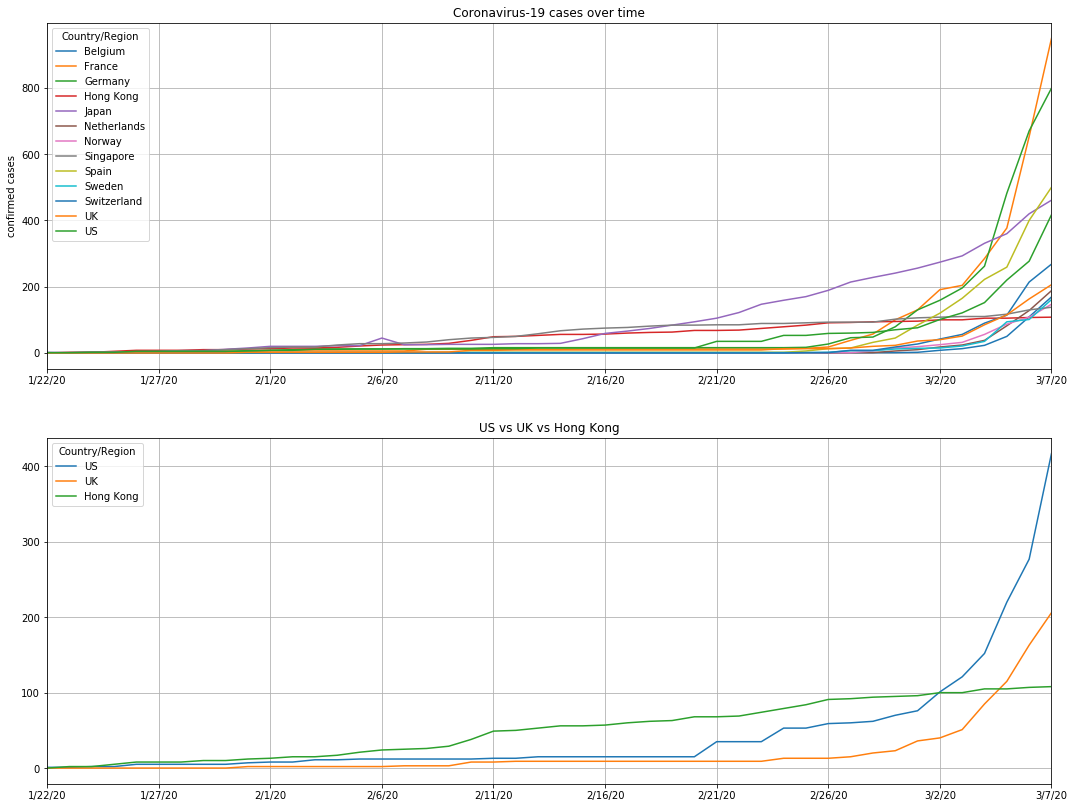

In [195]:
# import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

confirmed_csv = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
dead_csv      = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
recovered_csv = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
confirmed = pd.read_csv(confirmed_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
dead      = pd.read_csv(dead_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
recovered = pd.read_csv(recovered_csv).drop(['Lat','Long','Province/State'], axis=1).groupby('Country/Region').sum().T 
# toggle these thresholds to select countries to display in the time series. 
min_threshold_confirmed_cases = 100
max_threshold_confirmed_cases = 1000 # let's remove china for now. 
min2_threshold_confirmed_cases = 100
max2_threshold_confirmed_cases = 100000 # let's remove china for now. 
columns = list(confirmed)
selected  = []
deaths    = []
mortality_rate = []
all_mortality_rate = []
counts = []
for i in columns: 
    if min_threshold_confirmed_cases < confirmed[i][-1] < max_threshold_confirmed_cases and i != 'Others': 
      selected.append(i)
      deaths.append(dead[i][-1])
      mortality_rate.append(100*(dead[i][-1])/confirmed[i][-1])

    if min2_threshold_confirmed_cases < confirmed[i][-1] < max2_threshold_confirmed_cases and i != 'Others':       
      counts.append(i)
      all_mortality_rate.append(100*(dead[i][-1])/confirmed[i][-1])

subset = confirmed.loc[:,selected]
USvsUK = confirmed.loc[:,['US','UK','Hong Kong']]

fig, (ax1, ax2) = plt.subplots(2)
subset.plot(ax=ax1, grid='on')
ax1.set_title('Coronavirus-19 cases over time')
ax1.set_ylabel('confirmed cases')
# second plot is US and UK curves
USvsUK.plot(ax=ax2, grid='on')
ax2.set_title('US vs UK vs Hong Kong')
ax1.set_ylabel('confirmed cases')

The countries closest to China appear to have the most linear trends. Those in other parts of the world are rising exponentially. Why?

# Identifying the mortality rate


How should we estimate the mortality rate? 
For countries whose mortality rate is much higher than the WHO estimation, we have an indication that there is something wrong with their levels of testing, or treatment. 

Are Italy and the US having testing troubles? 

How would demographic skew, population numbers fit contribute toward this? 

How should mortality rate really be measured. For instance, I don't think active cases should be part of the calculation, just closed cases... in which case the mortality rate appears to go up far above 3.4%... 


Text(0.5, 1.0, 'Death ratios')

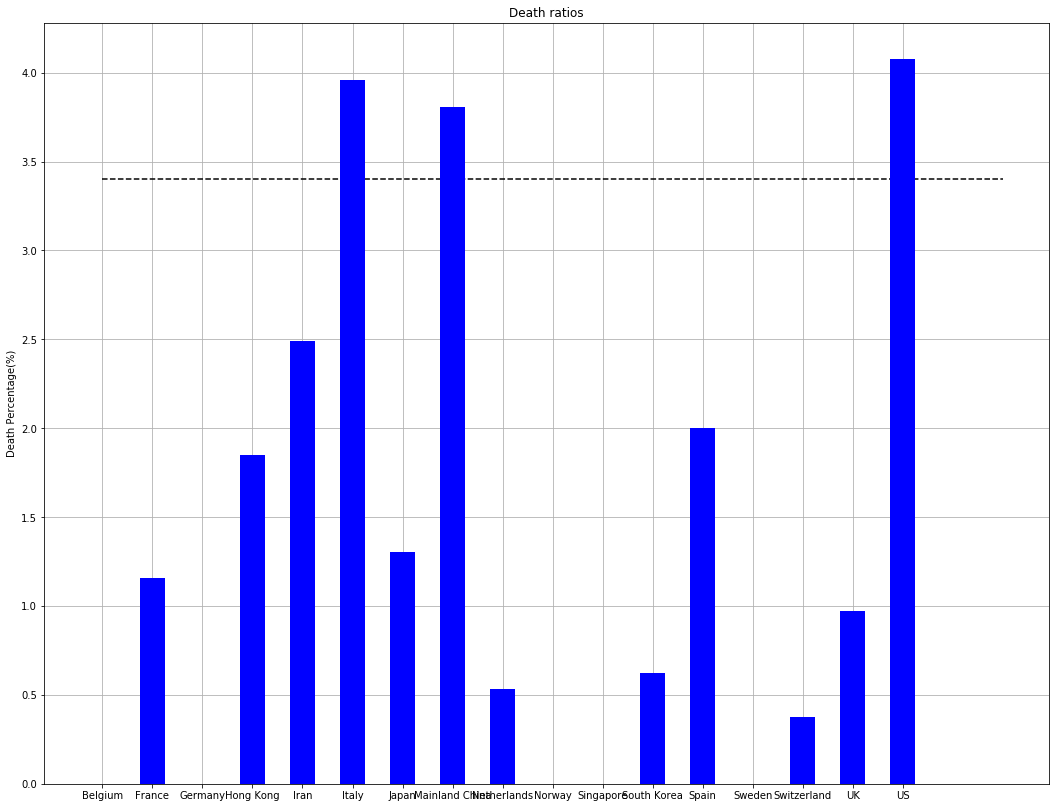

In [198]:
fig, (ax1) = plt.subplots(1)
ax1.grid(zorder=0)
ax1.bar(counts,all_mortality_rate, width=0.5, color='b', align='center',zorder = 3)
threshold = 3.4 # this is the WHO mortality estimation on March 3. 
ax1.plot([0., 18.0], [threshold, threshold], "k--")
ax1.set_ylabel('Death Percentage(%)')
ax1.set_title('Death ratios')